In [25]:
import numpy as np
from matplotlib import pyplot as plt

1 solar masses = 1 internal units for mass 

1 solar radius = 1 internal units for radius

In [28]:
M = 10**2 #total mass in internal units
a = (M)**(3/7)

print(a)

N = 1000 #number of particles
m = M/N #mass of each particle in internal units


7.196856730011519


## GENERATE r 
\begin{equation}
r(P)= a \cdot P^{1/3}
\end{equation}

In [8]:
def radius (P, a):
    return a*P**(1/3)

In [9]:
P_r =  np.random.uniform(0,1, N)
r = radius(P_r, a)

(array([0.00944099, 0.00944099, 0.01416149, 0.01888198, 0.01416149,
        0.01888198, 0.03304347, 0.02360248, 0.04720496, 0.07080744,
        0.08496893, 0.05664595, 0.07080744, 0.10385091, 0.09913042,
        0.08968943, 0.14633538, 0.14161488, 0.17937885, 0.23130431,
        0.16049687, 0.25018629, 0.23130431, 0.19826084, 0.32099373,
        0.31627324, 0.30683225, 0.31155274, 0.32571423, 0.40124217,
        0.43428564]),
 array([0.62311443, 0.83495658, 1.04679872, 1.25864086, 1.470483  ,
        1.68232514, 1.89416728, 2.10600943, 2.31785157, 2.52969371,
        2.74153585, 2.95337799, 3.16522014, 3.37706228, 3.58890442,
        3.80074656, 4.0125887 , 4.22443084, 4.43627299, 4.64811513,
        4.85995727, 5.07179941, 5.28364155, 5.49548369, 5.70732584,
        5.91916798, 6.13101012, 6.34285226, 6.5546944 , 6.76653655,
        6.97837869, 7.19022083]),
 <BarContainer object of 31 artists>)

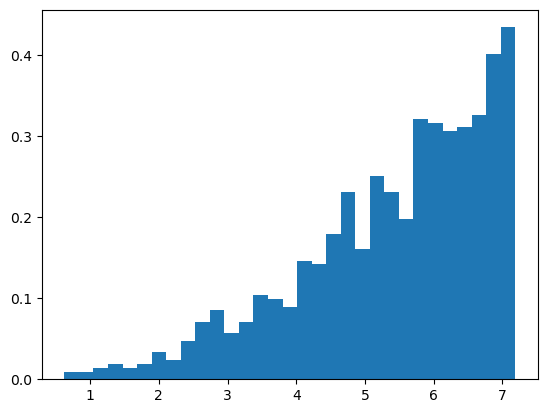

In [10]:
plt.hist(r, bins=int(N**0.5), density=True)

## GENERATE $\Phi$
\begin{equation}
\Phi = 2\pi P
\end{equation}

In [11]:
def phi (P):
    return 2*np.pi*P

In [12]:
P_p =  np.random.uniform(0,1, N)
p = phi(P_p)

(array([0.17293507, 0.17787607, 0.18281707, 0.19269907, 0.17293507,
        0.15317106, 0.12846605, 0.12846605, 0.12846605, 0.14328906,
        0.11364304, 0.15317106, 0.14823006, 0.11858405, 0.11858405,
        0.19269907, 0.14823006, 0.12352505, 0.17293507, 0.15317106,
        0.21740408, 0.16799406, 0.13834805, 0.19269907, 0.20258108,
        0.12846605, 0.14823006, 0.17787607, 0.18281707, 0.19269907,
        0.16799406]),
 array([6.24135403e-03, 2.08629456e-01, 4.11017559e-01, 6.13405661e-01,
        8.15793764e-01, 1.01818187e+00, 1.22056997e+00, 1.42295807e+00,
        1.62534617e+00, 1.82773428e+00, 2.03012238e+00, 2.23251048e+00,
        2.43489858e+00, 2.63728669e+00, 2.83967479e+00, 3.04206289e+00,
        3.24445099e+00, 3.44683910e+00, 3.64922720e+00, 3.85161530e+00,
        4.05400340e+00, 4.25639150e+00, 4.45877961e+00, 4.66116771e+00,
        4.86355581e+00, 5.06594391e+00, 5.26833202e+00, 5.47072012e+00,
        5.67310822e+00, 5.87549632e+00, 6.07788443e+00, 6.28027253

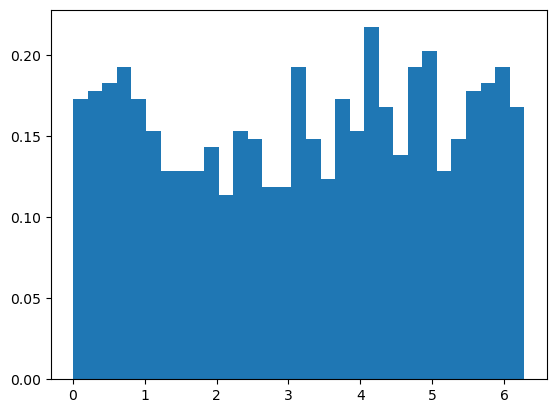

In [13]:
plt.hist(p, bins=int(N**0.5), density=True)

## GENERATE $\theta$
\begin{equation}
\theta = \arccos (1-2P)
\end{equation}

In [14]:
def theta (P):
    return np.arccos(1-2*P)

In [15]:
P_t =  np.random.uniform(0,1, N)
t = theta(P_t)

(array([0.08351412, 0.07307486, 0.15658898, 0.15658898, 0.26098164,
        0.44888841, 0.29229943, 0.31317796, 0.37581356, 0.44888841,
        0.37581356, 0.35493502, 0.46976694, 0.55328107, 0.42800988,
        0.48020621, 0.48020621, 0.53240254, 0.53240254, 0.50108474,
        0.40713135, 0.58459886, 0.49064548, 0.32361723, 0.21922457,
        0.26098164, 0.19834604, 0.25054237, 0.20878531, 0.11483192,
        0.06263559]),
 array([0.1017387 , 0.19753089, 0.29332307, 0.38911525, 0.48490743,
        0.58069961, 0.67649179, 0.77228397, 0.86807615, 0.96386833,
        1.05966051, 1.15545269, 1.25124487, 1.34703705, 1.44282923,
        1.53862141, 1.6344136 , 1.73020578, 1.82599796, 1.92179014,
        2.01758232, 2.1133745 , 2.20916668, 2.30495886, 2.40075104,
        2.49654322, 2.5923354 , 2.68812758, 2.78391976, 2.87971194,
        2.97550413, 3.07129631]),
 <BarContainer object of 31 artists>)

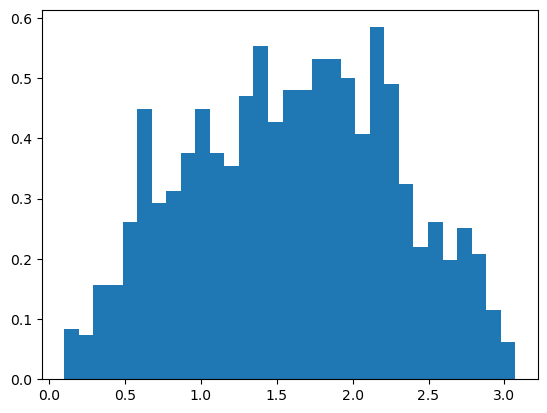

In [16]:
plt.hist(t, bins=int(N**0.5), density=True)

## From spherical to cartesian( \phi \).

In [17]:
def cart_x (r, t, p):
    return r * np.sin(t) * np.cos(p)

def cart_y (r, t, p):
    return r * np.sin(t) * np.sin(p)

def cart_z (r, t, p):
    return r * np.cos(t)

In [18]:
x=cart_x(r,t,p)
y=cart_y(r,t,p)
z=cart_z(r,t,p)

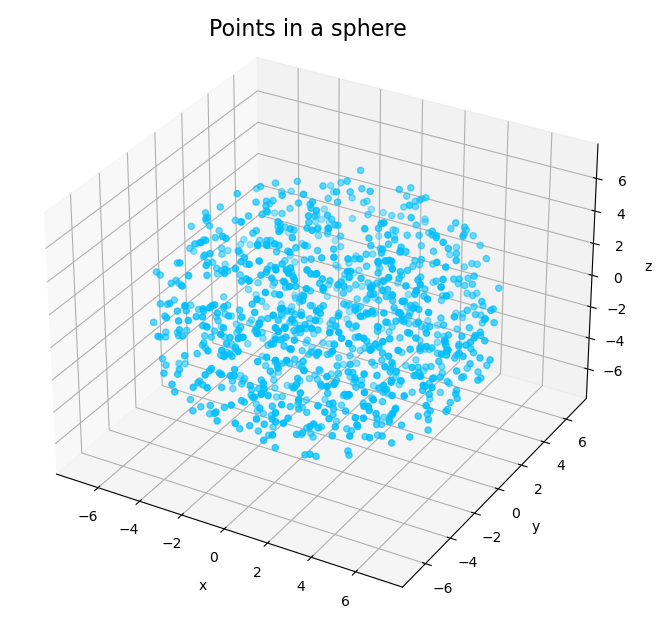

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
fig.suptitle("Points in a sphere", fontsize='16', y=0.87)
ax.set_xlabel('\nx')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x, y, z, color = 'deepskyblue')
plt.show()

### Create the input file

In [20]:
masses = np.ones(N)*m

matrix = (np.array([masses, x, y, z, np.zeros(N), np.zeros(N), np.zeros(N)])).T

In [21]:
with open("input.txt", "w") as input:
    input.write(str(N) + "\n")  
    input.write("0\n")  
    for i in range(N):
        input.write(" ".join(map(str, matrix[i])) + "\n")

In [22]:
def collapse_t(m,a):
    return ((3*np.pi/32) * ((4/3*np.pi*a**3)/m))**(1/2) #already in internal units

In [23]:
t=collapse_t(M,a)
print(t)

2.144465999599124


# PROVA: what happen if we generate $\Phi$, $\theta$ and r non independently

In [33]:
Pp=np.random.uniform(0,1,N)

In [34]:
rp=radius(Pp, a)
pp=phi(Pp)
tp=theta(Pp)

In [35]:
xp=cart_x(rp,tp,pp)
yp=cart_y(rp,tp,pp)
zp=cart_z(rp,tp,pp)

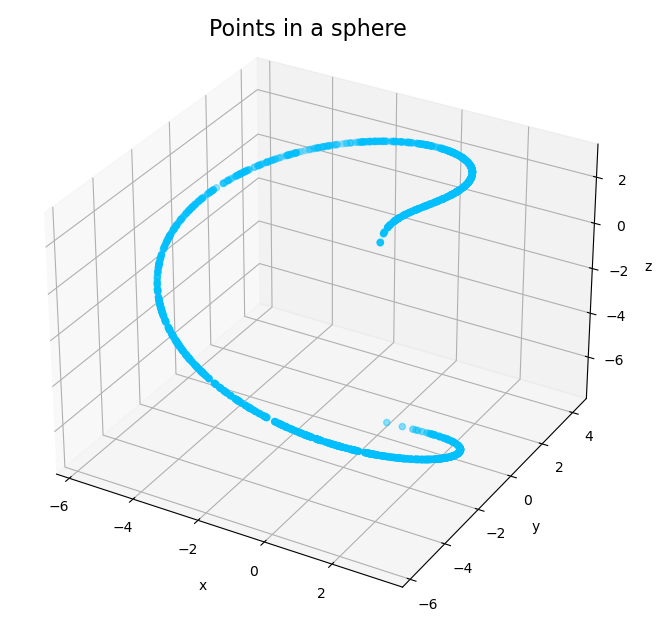

In [36]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
fig.suptitle("Points in a sphere", fontsize='16', y=0.87)
ax.set_xlabel('\nx')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(xp, yp, zp, color = 'deepskyblue')
plt.show()